generating the data

makes classification datasets


In [123]:
from sklearn.datasets import make_classification
import numpy as np
X,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=20)


In [124]:
import matplotlib.pyplot as plt

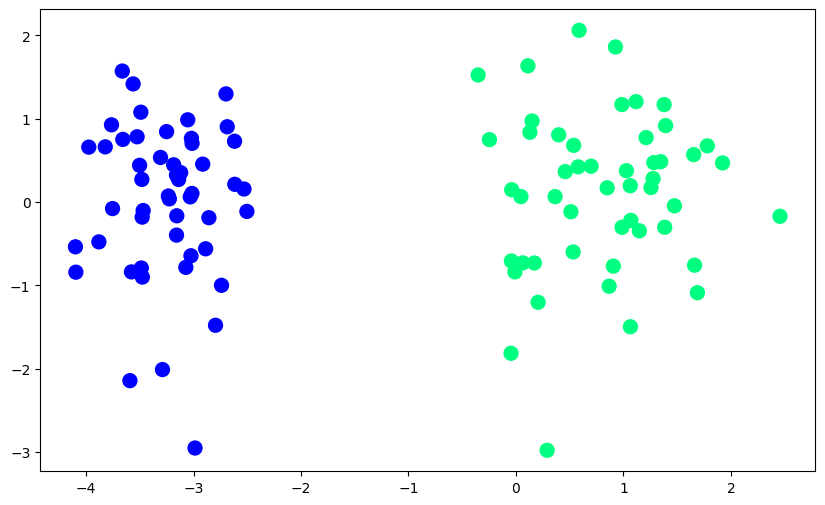

In [126]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

let create sckikit learn model to compare later

In [127]:

from sklearn.linear_model import LogisticRegression
model1=LogisticRegression(penalty='none',solver='sag')
model1.fit(X,y)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



LogisticRegression(penalty='none', solver='sag')

In [128]:
print(model1.coef_)
print(model1.intercept_)

[[4.79640413 0.20839248]]
[5.76712722]


In [129]:
m1=-(model1.coef_[0][0]/model1.coef_[0][1])
b1=-(model1.intercept_/model1.coef_[0][1])

In [130]:
x_input=np.linspace(-3,3,100)
y_input=m1*x_input + b1

In [136]:
def gd(X,y):
  X=np.insert(X,0,1,axis=1)
  weights=np.ones(X.shape[1])
  alpha=0.5

  for i in range(5000):
    y_hat=sigmoid(np.dot(X,weights))
    weights=weights+alpha*(np.dot((y-y_hat),X)/X.shape[0])

  return weights[1:],weights[0]

In [137]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [138]:
coef_,intercept_=gd(X,y)

In [139]:
m=-(coef_[0]/coef_[1])
b=-(intercept_/coef_[1])

In [140]:
x_input1=np.linspace(-3,3,100)
y_input1=m*x_input1 + b

(-3.0, 2.0)

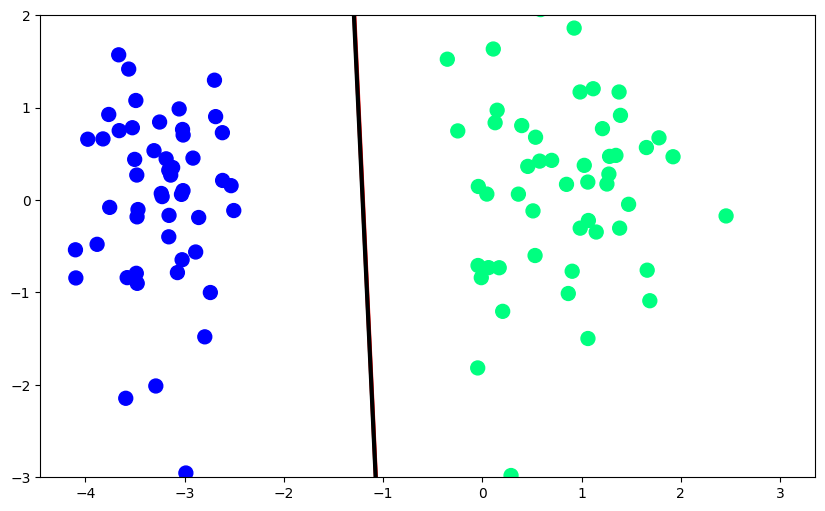

In [142]:
 plt.figure(figsize=(10,6))
 plt.plot(x_input,y_input,color='red',linewidth=3)
 plt.plot(x_input1,y_input1,color='black',linewidth=3)
 plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
 plt.ylim(-3,2)